# Taller Análisis de Datos de Educación
## Preparación de Datos y Visualizaciones

En este notebook vamos a:
1. Importar librerías necesarias
2. Cargar el archivo taller_graficos_educacion.xlsx
3. Examinar la estructura del conjunto de datos
4. Limpiar los datos (valores nulos)
5. Guardar el dataset limpio
6. Crear visualizaciones

In [15]:
# 1. Importar librerías necesarias para análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Configurar pandas para mejor visualización
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Librerías importadas correctamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")
print(f"Versión de matplotlib: {plt.matplotlib.__version__}")
print(f"Versión de seaborn: {sns.__version__}")

✓ Librerías importadas correctamente
Versión de pandas: 2.3.3
Versión de numpy: 2.3.3
Versión de matplotlib: 3.10.7
Versión de seaborn: 0.13.2


## 1. Cargar Datos desde Excel

In [16]:
# 2. Cargar el archivo taller_graficos_educacion.xlsx
ruta_archivo = r'C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\taller_graficos_educacion.xlsx'

# Verificar si el archivo existe
print(f"Verificando ruta: {ruta_archivo}")
print(f"¿Archivo existe? {os.path.exists(ruta_archivo)}\n")

if os.path.exists(ruta_archivo):
    # Cargar el archivo Excel
    df_original = pd.read_excel(ruta_archivo)
    print(f"✓ DATOS CARGADOS EXITOSAMENTE")
    print(f"{'='*80}")
else:
    # Listar archivos disponibles si no se encuentra
    directorio = os.path.dirname(ruta_archivo)
    if os.path.exists(directorio):
        archivos = os.listdir(directorio)
        print(f"\n⚠ ARCHIVO NO ENCONTRADO")
        print(f"Archivos disponibles en {directorio}:")
        for archivo in archivos:
            print(f"  - {archivo}")
    else:
        print(f"\n⚠ El directorio {directorio} no existe")
    
    raise FileNotFoundError(f"❌ Archivo no encontrado en {ruta_archivo}")

# Crear una copia para trabajar
df = df_original.copy()

print(f"\n{'='*80}")
print(f"INFORMACIÓN BÁSICA DEL DATASET ORIGINAL")
print(f"{'='*80}")
print(f"Número de registros: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print(f"\nPrimeras filas del dataset:")
display(df.head())

Verificando ruta: C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\raw\taller_graficos_educacion.xlsx
¿Archivo existe? True

✓ DATOS CARGADOS EXITOSAMENTE

INFORMACIÓN BÁSICA DEL DATASET ORIGINAL
Número de registros: 300
Número de columnas: 8

Primeras filas del dataset:


,ID_Estudiante,Edad,Genero,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Uso_Tecnologia,Satisfaccion_Clase
0,1,16,Femenino,3.67,2.98,3.10,Medio,5
1,2,17,Femenino,3.03,3.69,1.46,Medio,2
2,3,15,Masculino,3.25,4.57,3.15,Medio,4
3,4,17,Masculino,4.31,3.86,3.00,Medio,1
4,5,17,Masculino,2.73,4.62,2.92,Bajo,4


## 2. Examinar la Estructura del Conjunto de Datos

In [17]:
# 3. Examinar la estructura del conjunto de datos
print("=" * 80)
print("ESTRUCTURA DETALLADA DEL DATASET")
print("=" * 80)

# Información general
print("\nInformación del DataFrame:")
print(df.info())

print("\n" + "=" * 80)
print("COLUMNAS DEL DATASET")
print("=" * 80)
for i, col in enumerate(df.columns, 1):
    tipo = df[col].dtype
    unicos = df[col].nunique()
    print(f"{i:2d}. {col:30s} | Tipo: {str(tipo):10s} | Valores únicos: {unicos}")

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
display(df.describe(include='all'))

print("\n" + "=" * 80)
print("TIPOS DE DATOS POR COLUMNA")
print("=" * 80)
print(df.dtypes)

ESTRUCTURA DETALLADA DEL DATASET

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Estudiante             300 non-null    int64  
 1   Edad                      300 non-null    int64  
 2   Genero                    300 non-null    object 
 3   Horas_Estudio             300 non-null    float64
 4   Calificacion_Matematicas  300 non-null    float64
 5   Calificacion_Estadistica  298 non-null    float64
 6   Uso_Tecnologia            300 non-null    object 
 7   Satisfaccion_Clase        300 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 18.9+ KB
None

COLUMNAS DEL DATASET
 1. ID_Estudiante                  | Tipo: int64      | Valores únicos: 300
 2. Edad                           | Tipo: int64      | Valores únicos: 6
 3. Genero                         | Tipo: ob

,ID_Estudiante,Edad,Genero,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Uso_Tecnologia,Satisfaccion_Clase
count,300.00,300.00,300,300.00,300.00,298.00,300,300.00
unique,NaN,NaN,2,NaN,NaN,NaN,3,NaN
top,NaN,NaN,Femenino,NaN,NaN,NaN,Medio,NaN
freq,NaN,NaN,164,NaN,NaN,NaN,115,NaN
mean,150.50,15.41,NaN,2.57,3.23,3.07,NaN,3.16
std,86.75,1.69,NaN,1.07,0.87,0.92,NaN,1.43
min,1.00,13.00,NaN,-0.98,0.35,0.79,NaN,1.00
25%,75.75,14.00,NaN,1.86,2.72,2.48,NaN,2.00
50%,150.50,15.00,NaN,2.60,3.26,3.06,NaN,3.00
75%,225.25,17.00,NaN,3.17,3.84,3.71,NaN,4.00



TIPOS DE DATOS POR COLUMNA
ID_Estudiante                 int64
Edad                          int64
Genero                       object
Horas_Estudio               float64
Calificacion_Matematicas    float64
Calificacion_Estadistica    float64
Uso_Tecnologia               object
Satisfaccion_Clase            int64
dtype: object


## 3. Verificar y Tratar Valores Nulos

In [18]:
# 4. Verificar valores nulos y reemplazarlos por la media
print("=" * 80)
print("ANÁLISIS DE VALORES NULOS")
print("=" * 80)

# Contar valores nulos por columna
valores_nulos = df.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df) * 100).round(2)

# Crear DataFrame con resumen de nulos
resumen_nulos = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': valores_nulos.values,
    'Porcentaje': porcentaje_nulos.values,
    'Tipo_Dato': df.dtypes.values
})

print("\nResumen de valores nulos:")
display(resumen_nulos[resumen_nulos['Valores_Nulos'] > 0])

if valores_nulos.sum() == 0:
    print("\n✓ No hay valores nulos en el dataset")
else:
    print(f"\n⚠ Total de valores nulos en el dataset: {valores_nulos.sum()}")
    
    # Identificar columnas numéricas con valores nulos
    columnas_numericas = df.select_dtypes(include=[np.number]).columns
    columnas_con_nulos_numericas = [col for col in columnas_numericas if df[col].isnull().sum() > 0]
    
    if columnas_con_nulos_numericas:
        print(f"\n{'='*80}")
        print("REEMPLAZO DE VALORES NULOS CON LA MEDIA")
        print(f"{'='*80}")
        
        for col in columnas_con_nulos_numericas:
            media = df[col].mean()
            nulos_antes = df[col].isnull().sum()
            df[col].fillna(media, inplace=True)
            print(f"✓ {col}: {nulos_antes} valores nulos reemplazados con media = {media:.2f}")
    
    # Para columnas categóricas, rellenar con la moda
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    columnas_con_nulos_categoricas = [col for col in columnas_categoricas if df[col].isnull().sum() > 0]
    
    if columnas_con_nulos_categoricas:
        print(f"\n{'='*80}")
        print("REEMPLAZO DE VALORES NULOS EN COLUMNAS CATEGÓRICAS CON LA MODA")
        print(f"{'='*80}")
        
        for col in columnas_con_nulos_categoricas:
            moda = df[col].mode()[0] if not df[col].mode().empty else 'Desconocido'
            nulos_antes = df[col].isnull().sum()
            df[col].fillna(moda, inplace=True)
            print(f"✓ {col}: {nulos_antes} valores nulos reemplazados con moda = '{moda}'")

# Verificar que no quedan valores nulos
print(f"\n{'='*80}")
print("VERIFICACIÓN FINAL DE VALORES NULOS")
print(f"{'='*80}")
nulos_restantes = df.isnull().sum().sum()
if nulos_restantes == 0:
    print("✓ No quedan valores nulos en el dataset")
else:
    print(f"⚠ Aún quedan {nulos_restantes} valores nulos")
    print(df.isnull().sum()[df.isnull().sum() > 0])

ANÁLISIS DE VALORES NULOS

Resumen de valores nulos:


,Columna,Valores_Nulos,Porcentaje,Tipo_Dato
5,Calificacion_Estadistica,2,0.67,float64



⚠ Total de valores nulos en el dataset: 2

REEMPLAZO DE VALORES NULOS CON LA MEDIA
✓ Calificacion_Estadistica: 2 valores nulos reemplazados con media = 3.07

VERIFICACIÓN FINAL DE VALORES NULOS
✓ No quedan valores nulos en el dataset


C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_24644\3658529389.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


## 4. Guardar Dataset Limpio

In [11]:
# 5. Guardar el nuevo conjunto de datos limpio
ruta_salida = r'C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\processed\taller_graficos_educacion_limpio.xlsx'

# Crear directorio si no existe
directorio_salida = os.path.dirname(ruta_salida)
os.makedirs(directorio_salida, exist_ok=True)

# Guardar el dataset limpio
df.to_excel(ruta_salida, index=False)

print("=" * 80)
print("DATASET LIMPIO GUARDADO")
print("=" * 80)
print(f"✓ Archivo guardado en: {ruta_salida}")
print(f"Tamaño del archivo: {os.path.getsize(ruta_salida) / 1024:.2f} KB")
print(f"\nRegistros: {len(df)}")
print(f"Columnas: {len(df.columns)}")
print(f"Valores nulos: {df.isnull().sum().sum()}")

# Mostrar resumen del dataset limpio
print(f"\n{'='*80}")
print("RESUMEN DEL DATASET LIMPIO")
print(f"{'='*80}")
print("\nPrimeras filas del dataset limpio:")
display(df.head())

print("\nÚltimas filas del dataset limpio:")
display(df.tail())

DATASET LIMPIO GUARDADO
✓ Archivo guardado en: C:\Users\omaroalvaradoc\Documents\Personal\Proyectos\CURSO IA\data\processed\taller_graficos_educacion_limpio.xlsx
Tamaño del archivo: 16.24 KB

Registros: 300
Columnas: 8
Valores nulos: 0

RESUMEN DEL DATASET LIMPIO

Primeras filas del dataset limpio:


,ID_Estudiante,Edad,Genero,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Uso_Tecnologia,Satisfaccion_Clase
0,1,16,Femenino,3.67,2.98,3.10,Medio,5
1,2,17,Femenino,3.03,3.69,1.46,Medio,2
2,3,15,Masculino,3.25,4.57,3.15,Medio,4
3,4,17,Masculino,4.31,3.86,3.00,Medio,1
4,5,17,Masculino,2.73,4.62,2.92,Bajo,4



Últimas filas del dataset limpio:


,ID_Estudiante,Edad,Genero,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Uso_Tecnologia,Satisfaccion_Clase
295,296,16,Femenino,3.14,4.16,5.02,Medio,2
296,297,18,Femenino,2.06,3.28,2.73,Bajo,3
297,298,16,Femenino,2.96,2.00,2.97,Bajo,4
298,299,18,Femenino,3.15,3.71,1.93,Bajo,4
299,300,15,Masculino,1.21,5.16,3.28,Medio,3


## 5. Análisis Exploratorio de Datos (EDA)

In [19]:
# Identificar tipos de columnas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("=" * 80)
print("CLASIFICACIÓN DE VARIABLES")
print("=" * 80)

print(f"\nColumnas Numéricas ({len(columnas_numericas)}):")
for i, col in enumerate(columnas_numericas, 1):
    print(f"  {i}. {col}")

print(f"\nColumnas Categóricas ({len(columnas_categoricas)}):")
for i, col in enumerate(columnas_categoricas, 1):
    print(f"  {i}. {col} - Valores únicos: {df[col].nunique()}")

# Análisis de columnas categóricas
if columnas_categoricas:
    print(f"\n{'='*80}")
    print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS")
    print(f"{'='*80}")
    
    for col in columnas_categoricas:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Total de valores únicos: {df[col].nunique()}")

# Estadísticas de columnas numéricas
if columnas_numericas:
    print(f"\n{'='*80}")
    print("ESTADÍSTICAS DE VARIABLES NUMÉRICAS")
    print(f"{'='*80}")
    display(df[columnas_numericas].describe())

# Muestra aleatoria
print(f"\n{'='*80}")
print("MUESTRA ALEATORIA (5 registros)")
print(f"{'='*80}")
display(df.sample(min(5, len(df))))

CLASIFICACIÓN DE VARIABLES

Columnas Numéricas (6):
  1. ID_Estudiante
  2. Edad
  3. Horas_Estudio
  4. Calificacion_Matematicas
  5. Calificacion_Estadistica
  6. Satisfaccion_Clase

Columnas Categóricas (2):
  1. Genero - Valores únicos: 2
  2. Uso_Tecnologia - Valores únicos: 3

DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS

Genero:
Genero
Femenino     164
Masculino    136
Name: count, dtype: int64
Total de valores únicos: 2

Uso_Tecnologia:
Uso_Tecnologia
Medio    115
Bajo      97
Alto      88
Name: count, dtype: int64
Total de valores únicos: 3

ESTADÍSTICAS DE VARIABLES NUMÉRICAS


,ID_Estudiante,Edad,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Satisfaccion_Clase
count,300.00,300.00,300.00,300.00,300.00,300.00
mean,150.50,15.41,2.57,3.23,3.07,3.16
std,86.75,1.69,1.07,0.87,0.91,1.43
min,1.00,13.00,-0.98,0.35,0.79,1.00
25%,75.75,14.00,1.86,2.72,2.49,2.00
50%,150.50,15.00,2.60,3.26,3.06,3.00
75%,225.25,17.00,3.17,3.84,3.70,4.00
max,300.00,18.00,5.75,5.74,5.78,5.00



MUESTRA ALEATORIA (5 registros)


,ID_Estudiante,Edad,Genero,Horas_Estudio,Calificacion_Matematicas,Calificacion_Estadistica,Uso_Tecnologia,Satisfaccion_Clase
211,212,13,Masculino,2.23,1.78,4.38,Bajo,5
178,179,18,Masculino,2.31,2.86,3.86,Medio,3
263,264,15,Femenino,5.12,3.06,3.15,Medio,1
154,155,16,Femenino,-0.98,3.18,5.13,Bajo,1
86,87,13,Femenino,3.15,3.56,2.30,Medio,2


## 6. Visualizaciones del Dataset Limpio

Ahora que tenemos los datos limpios, vamos a crear las siguientes visualizaciones:
1. Gráfico circular: proporción de estudiantes según nivel de uso de tecnología
2. Gráfico de líneas: promedio de calificaciones de Estadística según edad
3. Histograma de frecuencias: distribución de horas de estudio
4. Diagrama de caja y bigotes: calificaciones de Estadística entre géneros
5. Diagrama de dispersión: horas de estudio vs calificación en Estadística
6. Histograma con curva KDE: distribución de calificaciones en Matemáticas

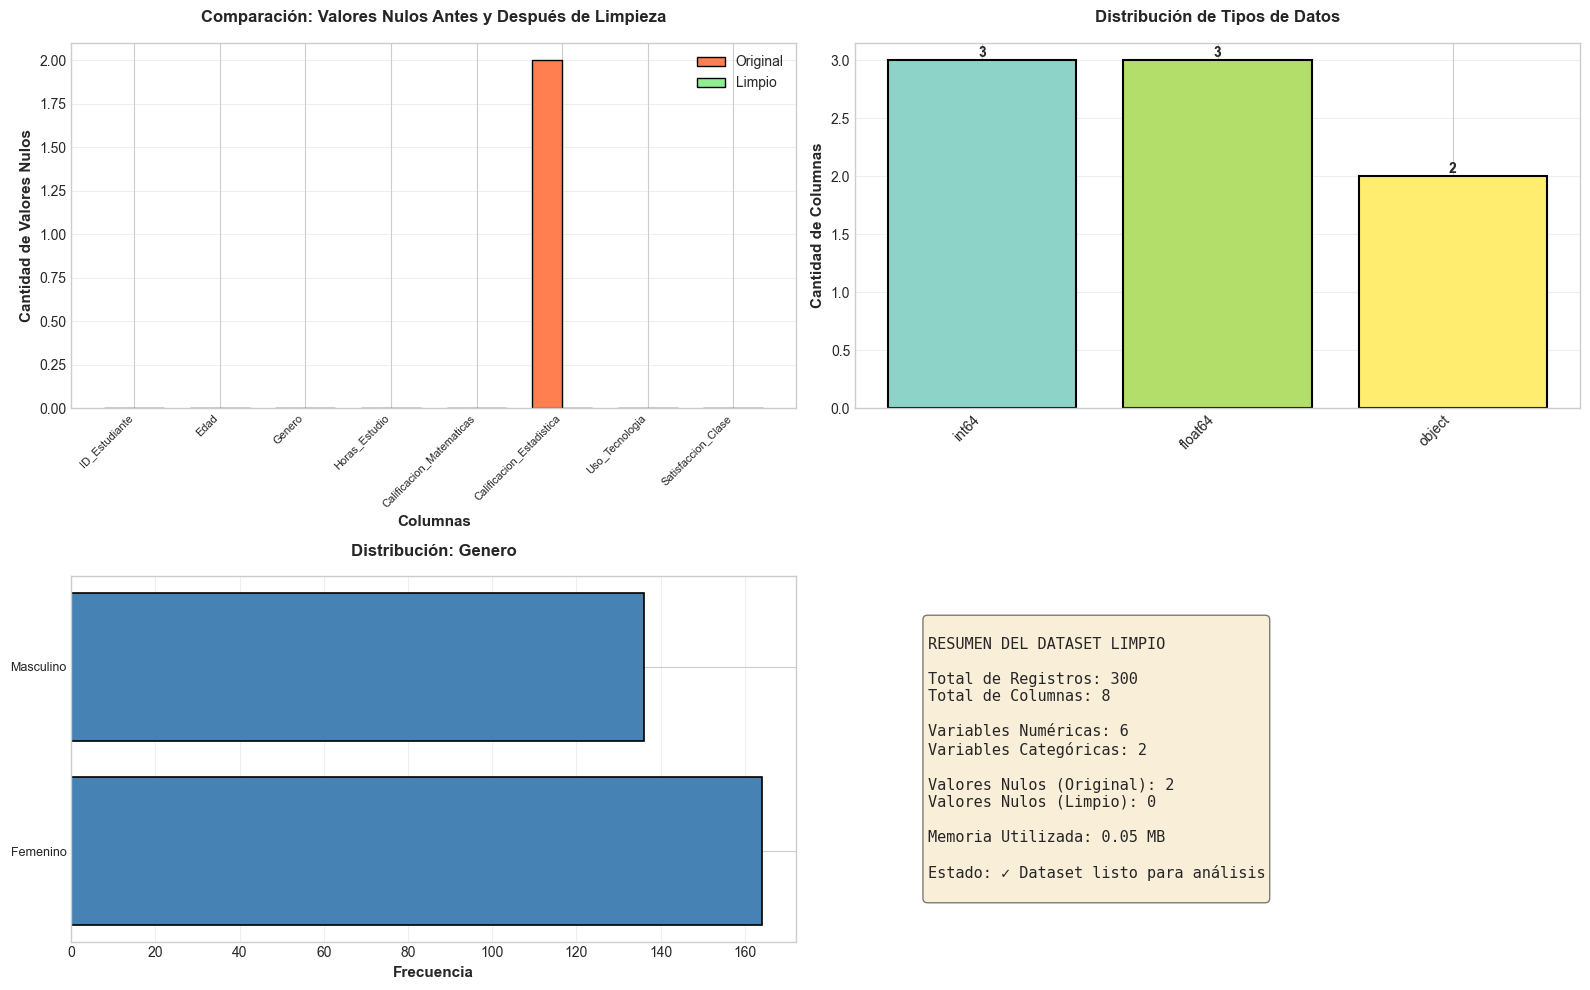


DATASET PREPARADO Y LISTO PARA ANÁLISIS
✓ Datos cargados
✓ Estructura examinada
✓ Valores nulos tratados
✓ Dataset limpio guardado

Puedes proceder con análisis más específicos y visualizaciones avanzadas.


In [20]:
# Crear visualizaciones del dataset limpio
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Distribución de valores nulos (antes vs después)
ax1 = axes[0, 0]
nulos_original = df_original.isnull().sum()
nulos_limpio = df.isnull().sum()

x = np.arange(len(df.columns))
width = 0.35

bars1 = ax1.bar(x - width/2, nulos_original, width, label='Original', color='coral', edgecolor='black')
bars2 = ax1.bar(x + width/2, nulos_limpio, width, label='Limpio', color='lightgreen', edgecolor='black')

ax1.set_xlabel('Columnas', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cantidad de Valores Nulos', fontsize=11, fontweight='bold')
ax1.set_title('Comparación: Valores Nulos Antes y Después de Limpieza', fontsize=12, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(df.columns, rotation=45, ha='right', fontsize=8)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Gráfico 2: Tipos de datos
ax2 = axes[0, 1]
tipos_datos = df.dtypes.value_counts()
colores = plt.cm.Set3(np.linspace(0, 1, len(tipos_datos)))
bars = ax2.bar(range(len(tipos_datos)), tipos_datos.values, color=colores, edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(tipos_datos)))
ax2.set_xticklabels([str(t) for t in tipos_datos.index], rotation=45, ha='right')
ax2.set_title('Distribución de Tipos de Datos', fontsize=12, fontweight='bold', pad=15)
ax2.set_ylabel('Cantidad de Columnas', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(tipos_datos.values):
    ax2.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Gráfico 3: Distribución de registros por variable categórica (si existe)
ax3 = axes[1, 0]
if columnas_categoricas:
    primera_categorica = columnas_categoricas[0]
    conteo = df[primera_categorica].value_counts()
    ax3.barh(range(len(conteo)), conteo.values, color='steelblue', edgecolor='black', linewidth=1.2)
    ax3.set_yticks(range(len(conteo)))
    ax3.set_yticklabels(conteo.index, fontsize=9)
    ax3.set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
    ax3.set_title(f'Distribución: {primera_categorica}', fontsize=12, fontweight='bold', pad=15)
    ax3.grid(True, alpha=0.3, axis='x')
else:
    ax3.text(0.5, 0.5, 'No hay variables categóricas', ha='center', va='center', 
            fontsize=12, transform=ax3.transAxes)
    ax3.set_title('Variables Categóricas', fontsize=12, fontweight='bold', pad=15)

# Gráfico 4: Estadísticas del dataset
ax4 = axes[1, 1]
ax4.axis('off')
info_text = f"""
RESUMEN DEL DATASET LIMPIO

Total de Registros: {len(df):,}
Total de Columnas: {len(df.columns)}

Variables Numéricas: {len(columnas_numericas)}
Variables Categóricas: {len(columnas_categoricas)}

Valores Nulos (Original): {df_original.isnull().sum().sum():,}
Valores Nulos (Limpio): {df.isnull().sum().sum()}

Memoria Utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

Estado: ✓ Dataset listo para análisis
"""
ax4.text(0.1, 0.5, info_text, transform=ax4.transAxes, fontsize=11,
        verticalalignment='center', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("DATASET PREPARADO Y LISTO PARA ANÁLISIS")
print("=" * 80)
print("✓ Datos cargados")
print("✓ Estructura examinada")
print("✓ Valores nulos tratados")
print("✓ Dataset limpio guardado")
print("\nPuedes proceder con análisis más específicos y visualizaciones avanzadas.")

## 7. Gráfico Circular: Proporción de Estudiantes por Nivel de Uso de Tecnología

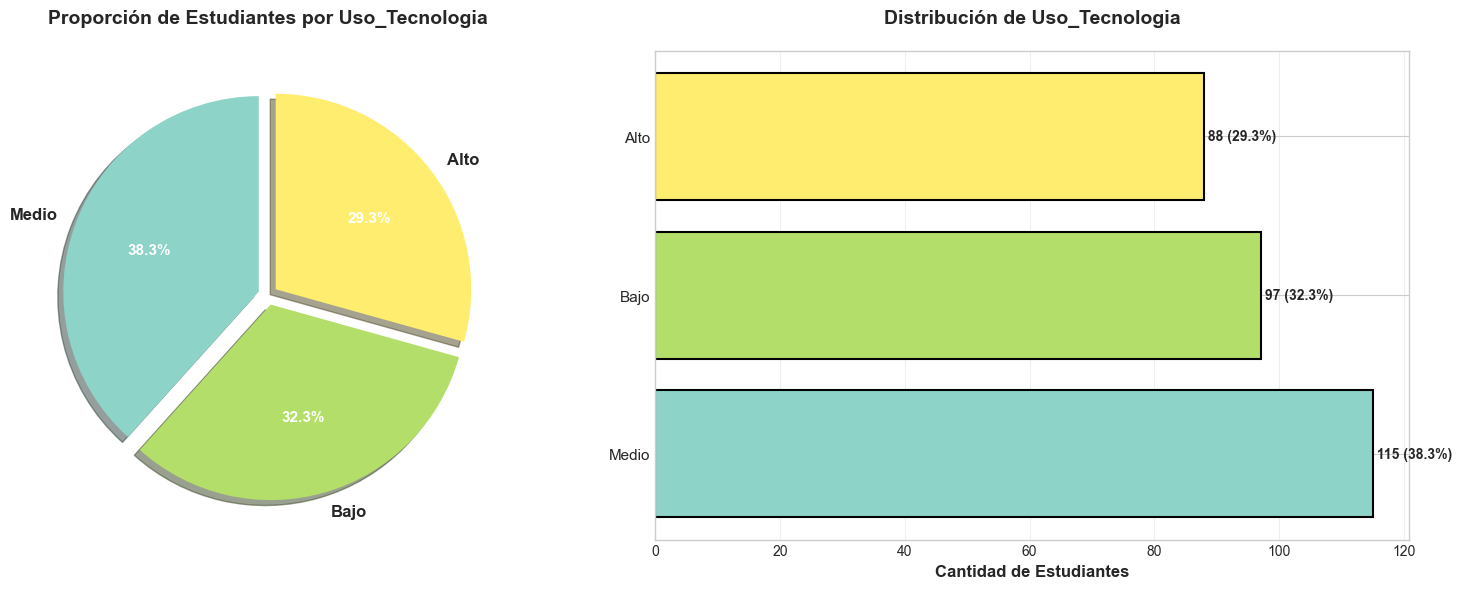

DISTRIBUCIÓN DE USO_TECNOLOGIA
Uso_Tecnologia
Medio    115
Bajo      97
Alto      88
Name: count, dtype: int64

Porcentajes:
Uso_Tecnologia
Medio   38.33
Bajo    32.33
Alto    29.33
Name: count, dtype: float64


In [21]:
# 1. Gráfico circular: proporción según nivel de uso de tecnología
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Identificar la columna de tecnología (puede variar el nombre)
col_tecnologia = [col for col in df.columns if 'tecnolog' in col.lower() or 'tech' in col.lower()]
if col_tecnologia:
    col_tec = col_tecnologia[0]
    
    # Gráfico 1: Pie chart
    ax1 = axes[0]
    conteo_tec = df[col_tec].value_counts()
    colores = plt.cm.Set3(np.linspace(0, 1, len(conteo_tec)))
    
    wedges, texts, autotexts = ax1.pie(conteo_tec.values, 
                                        labels=conteo_tec.index,
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=colores,
                                        explode=[0.05] * len(conteo_tec),
                                        shadow=True)
    
    # Mejorar apariencia del texto
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(11)
    
    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')
    
    ax1.set_title(f'Proporción de Estudiantes por {col_tec}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Gráfico 2: Barras horizontales
    ax2 = axes[1]
    ax2.barh(range(len(conteo_tec)), conteo_tec.values, 
            color=colores, edgecolor='black', linewidth=1.5)
    ax2.set_yticks(range(len(conteo_tec)))
    ax2.set_yticklabels(conteo_tec.index, fontsize=11)
    ax2.set_xlabel('Cantidad de Estudiantes', fontsize=12, fontweight='bold')
    ax2.set_title(f'Distribución de {col_tec}', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Añadir valores
    for i, v in enumerate(conteo_tec.values):
        ax2.text(v, i, f' {v} ({v/len(df)*100:.1f}%)', 
                va='center', fontweight='bold', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)
    print(f"DISTRIBUCIÓN DE {col_tec.upper()}")
    print("=" * 80)
    print(conteo_tec)
    print(f"\nPorcentajes:")
    print((conteo_tec / len(df) * 100).round(2))
else:
    print("⚠ No se encontró columna de tecnología en el dataset")

## 8. Gráfico de Líneas: Promedio de Calificaciones de Estadística por Edad

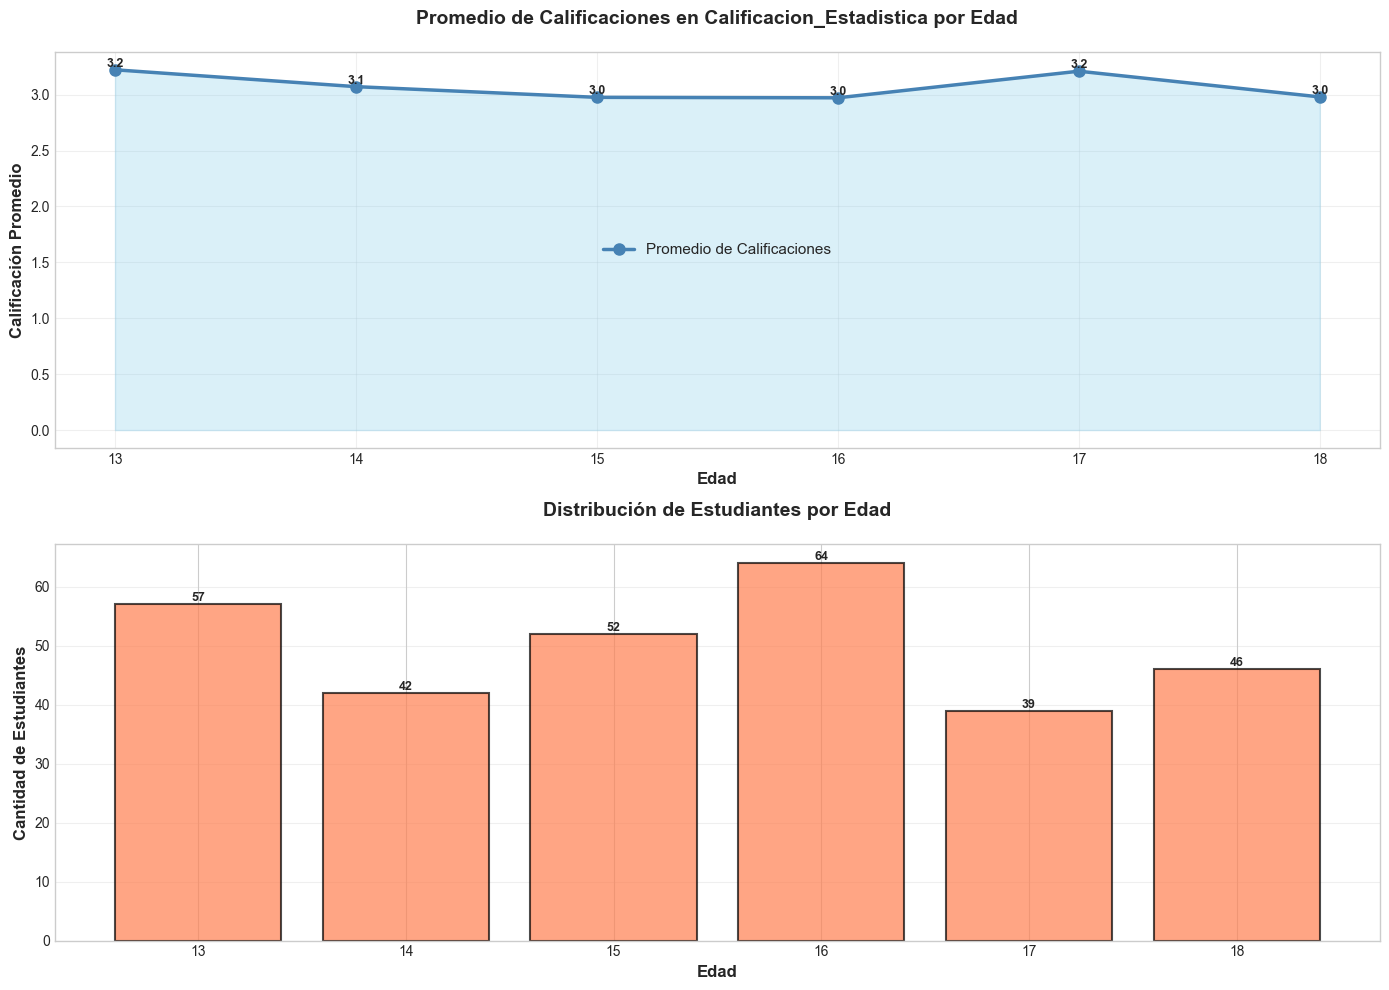

PROMEDIO DE CALIFICACION_ESTADISTICA POR EDAD


,Edad,Promedio,Cantidad,Desv_Std
0,13,3.22,57,0.94
1,14,3.07,42,0.89
2,15,2.98,52,0.96
3,16,2.97,64,0.80
4,17,3.21,39,0.99
5,18,2.98,46,0.93


In [22]:
# 2. Gráfico de líneas: promedio de calificaciones de Estadística según edad
col_edad = [col for col in df.columns if 'edad' in col.lower() or 'age' in col.lower()]
col_estadistica = [col for col in df.columns if 'estad' in col.lower() or 'stat' in col.lower()]

if col_edad and col_estadistica:
    col_e = col_edad[0]
    col_est = col_estadistica[0]
    
    # Calcular promedio por edad
    promedio_por_edad = df.groupby(col_e)[col_est].agg(['mean', 'count', 'std']).reset_index()
    promedio_por_edad.columns = ['Edad', 'Promedio', 'Cantidad', 'Desv_Std']
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfico 1: Línea con área sombreada
    ax1 = axes[0]
    ax1.plot(promedio_por_edad['Edad'], promedio_por_edad['Promedio'], 
            marker='o', linewidth=2.5, markersize=8, color='steelblue', 
            label='Promedio de Calificaciones')
    ax1.fill_between(promedio_por_edad['Edad'], promedio_por_edad['Promedio'], 
                     alpha=0.3, color='skyblue')
    
    ax1.set_xlabel('Edad', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Calificación Promedio', fontsize=12, fontweight='bold')
    ax1.set_title(f'Promedio de Calificaciones en {col_est} por Edad', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Añadir valores en los puntos
    for i, row in promedio_por_edad.iterrows():
        ax1.text(row['Edad'], row['Promedio'], f"{row['Promedio']:.1f}", 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Gráfico 2: Cantidad de estudiantes por edad
    ax2 = axes[1]
    ax2.bar(promedio_por_edad['Edad'], promedio_por_edad['Cantidad'], 
           color='coral', alpha=0.7, edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('Edad', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Cantidad de Estudiantes', fontsize=12, fontweight='bold')
    ax2.set_title('Distribución de Estudiantes por Edad', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Añadir valores
    for i, row in promedio_por_edad.iterrows():
        ax2.text(row['Edad'], row['Cantidad'], str(int(row['Cantidad'])), 
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)
    print(f"PROMEDIO DE {col_est.upper()} POR EDAD")
    print("=" * 80)
    display(promedio_por_edad)
else:
    print("⚠ No se encontraron columnas de edad o estadística")

## 9. Histograma de Frecuencias: Distribución de Horas de Estudio

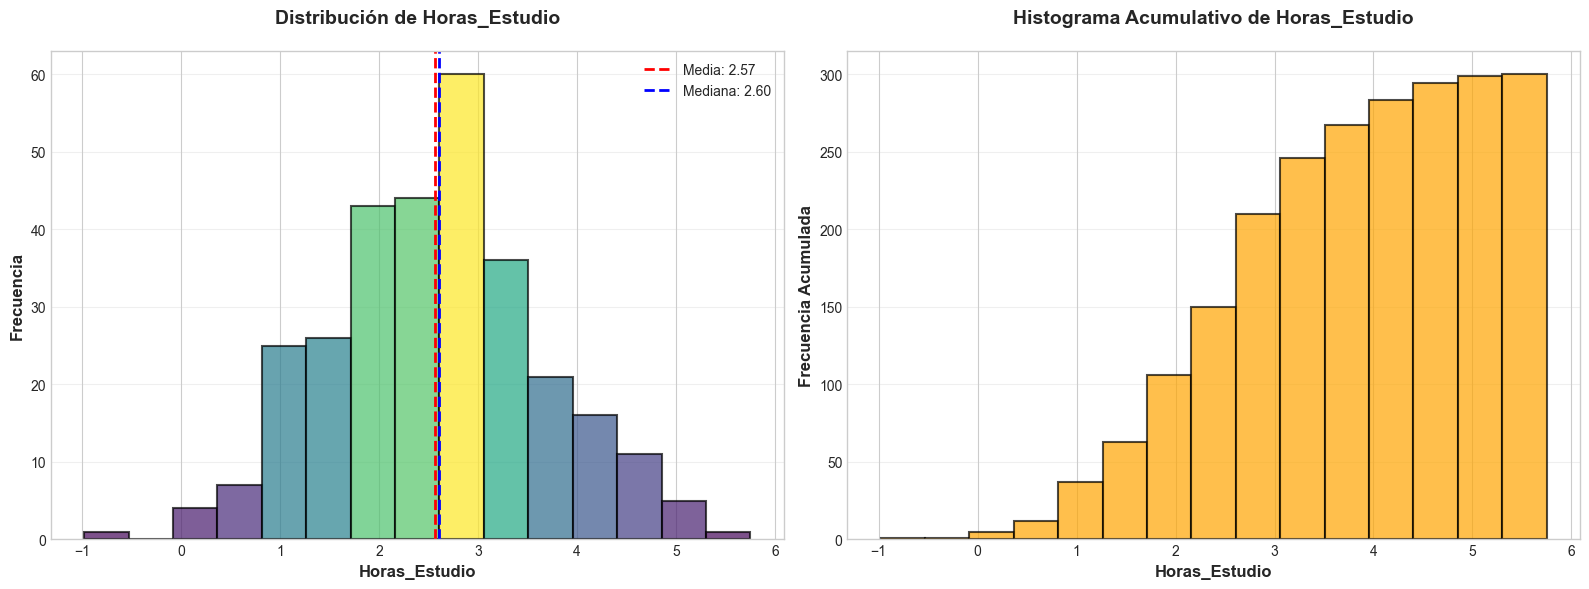

ESTADÍSTICAS DE HORAS_ESTUDIO
Media: 2.57
Mediana: 2.60
Moda: 2.73
Desviación estándar: 1.07
Mínimo: -0.98
Máximo: 5.75


In [23]:
# 3. Histograma de frecuencias: distribución de horas de estudio
col_horas = [col for col in df.columns if 'hora' in col.lower() or 'hour' in col.lower() or 'estudio' in col.lower()]

if col_horas:
    col_h = col_horas[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Histograma clásico
    ax1 = axes[0]
    n, bins, patches = ax1.hist(df[col_h], bins=15, edgecolor='black', 
                                linewidth=1.5, alpha=0.7, color='green')
    
    # Colorear barras según altura
    cm = plt.cm.viridis
    norm = plt.Normalize(vmin=n.min(), vmax=n.max())
    for i, patch in enumerate(patches):
        patch.set_facecolor(cm(norm(n[i])))
    
    ax1.set_xlabel(f'{col_h}', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
    ax1.set_title(f'Distribución de {col_h}', fontsize=14, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Añadir líneas de estadísticas
    media = df[col_h].mean()
    mediana = df[col_h].median()
    ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax1.axvline(mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax1.legend()
    
    # Gráfico 2: Histograma acumulativo
    ax2 = axes[1]
    ax2.hist(df[col_h], bins=15, cumulative=True, edgecolor='black', 
            linewidth=1.5, alpha=0.7, color='orange')
    ax2.set_xlabel(f'{col_h}', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frecuencia Acumulada', fontsize=12, fontweight='bold')
    ax2.set_title(f'Histograma Acumulativo de {col_h}', fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)
    print(f"ESTADÍSTICAS DE {col_h.upper()}")
    print("=" * 80)
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {df[col_h].mode().values[0]:.2f}")
    print(f"Desviación estándar: {df[col_h].std():.2f}")
    print(f"Mínimo: {df[col_h].min():.2f}")
    print(f"Máximo: {df[col_h].max():.2f}")
else:
    print("⚠ No se encontró columna de horas de estudio")

## 10. Diagrama de Caja y Bigotes: Calificaciones de Estadística por Género

C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_24644\981638680.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col_gen, y=col_est, ax=ax1, palette='Set2')
C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_24644\981638680.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col_gen, y=col_est, ax=ax2, palette='muted')


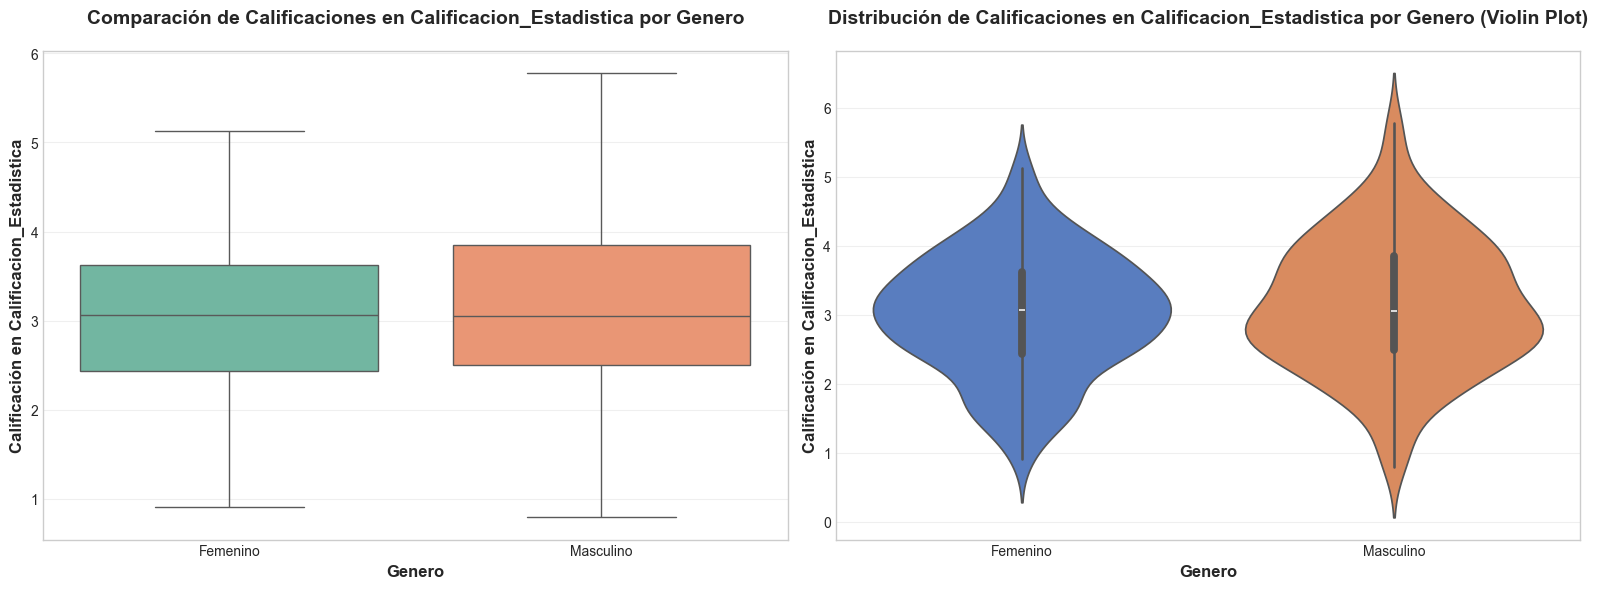

ESTADÍSTICAS DE CALIFICACION_ESTADISTICA POR GENERO


,Media,Mediana,Desv_Std,Mínimo,Máximo,Cantidad
Genero,,,,,,
Femenino,3.01,3.07,0.87,0.91,5.13,164
Masculino,3.14,3.05,0.97,0.79,5.78,136


In [24]:
# 4. Diagrama de caja y bigotes: calificaciones de Estadística entre géneros
col_genero = [col for col in df.columns if 'gen' in col.lower() or 'sex' in col.lower()]

if col_genero and col_estadistica:
    col_gen = col_genero[0]
    col_est = col_estadistica[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Boxplot con seaborn
    ax1 = axes[0]
    sns.boxplot(data=df, x=col_gen, y=col_est, ax=ax1, palette='Set2')
    ax1.set_xlabel(col_gen, fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'Calificación en {col_est}', fontsize=12, fontweight='bold')
    ax1.set_title(f'Comparación de Calificaciones en {col_est} por {col_gen}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Gráfico 2: Violinplot
    ax2 = axes[1]
    sns.violinplot(data=df, x=col_gen, y=col_est, ax=ax2, palette='muted')
    ax2.set_xlabel(col_gen, fontsize=12, fontweight='bold')
    ax2.set_ylabel(f'Calificación en {col_est}', fontsize=12, fontweight='bold')
    ax2.set_title(f'Distribución de Calificaciones en {col_est} por {col_gen} (Violin Plot)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por género
    print("=" * 80)
    print(f"ESTADÍSTICAS DE {col_est.upper()} POR {col_gen.upper()}")
    print("=" * 80)
    stats_genero = df.groupby(col_gen)[col_est].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv_Std', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('Cantidad', 'count')
    ]).round(2)
    display(stats_genero)
else:
    print("⚠ No se encontraron columnas de género o estadística")

## 11. Diagrama de Dispersión: Horas de Estudio vs Calificación en Estadística

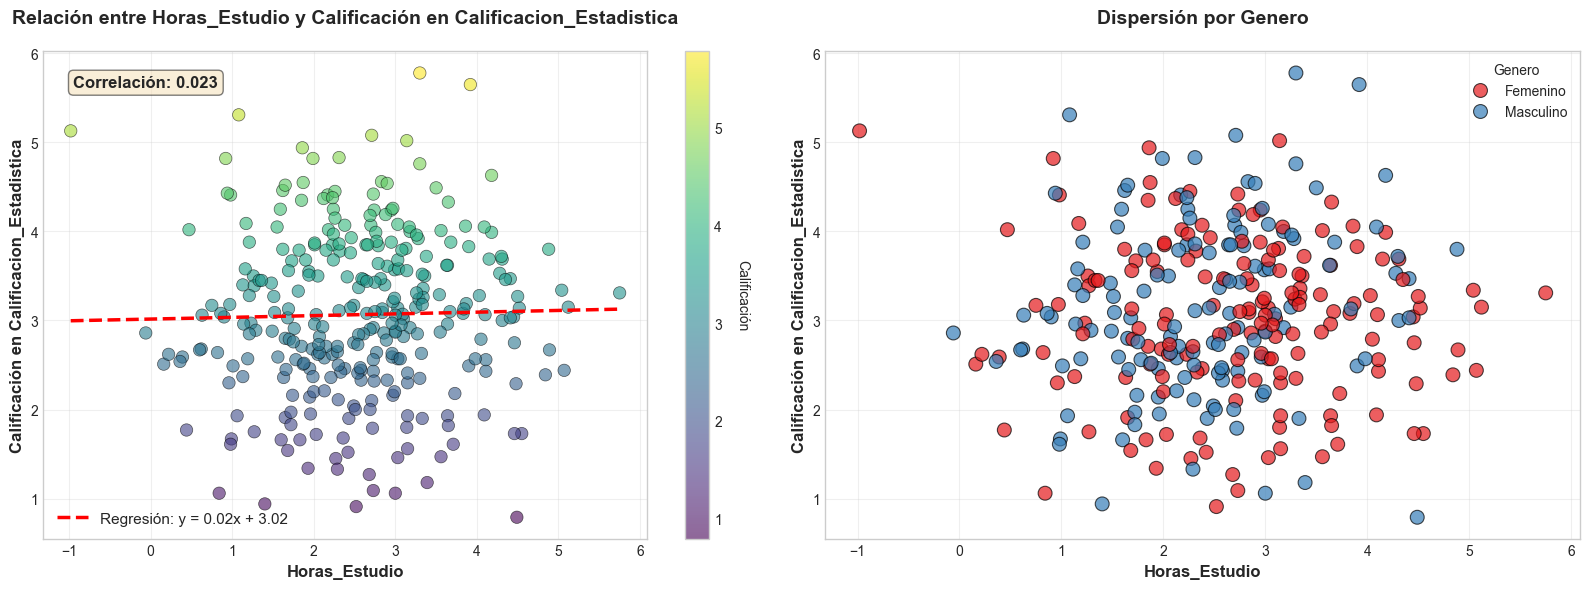

ANÁLISIS DE CORRELACIÓN
Correlación de Pearson: 0.0227

Interpretación:
→ Correlación débil


In [25]:
# 5. Diagrama de dispersión: horas de estudio vs calificación en Estadística
if col_horas and col_estadistica:
    col_h = col_horas[0]
    col_est = col_estadistica[0]
    
    from scipy import stats as sp_stats
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Dispersión con línea de regresión
    ax1 = axes[0]
    scatter = ax1.scatter(df[col_h], df[col_est], 
                         alpha=0.6, s=80, c=df[col_est], 
                         cmap='viridis', edgecolors='black', linewidth=0.5)
    
    # Línea de regresión
    z = np.polyfit(df[col_h], df[col_est], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[col_h].min(), df[col_h].max(), 100)
    ax1.plot(x_line, p(x_line), "r--", linewidth=2.5, 
            label=f'Regresión: y = {z[0]:.2f}x + {z[1]:.2f}')
    
    ax1.set_xlabel(col_h, fontsize=12, fontweight='bold')
    ax1.set_ylabel(f'Calificación en {col_est}', fontsize=12, fontweight='bold')
    ax1.set_title(f'Relación entre {col_h} y Calificación en {col_est}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label('Calificación', rotation=270, labelpad=20)
    
    # Calcular correlación
    correlacion = df[col_h].corr(df[col_est])
    ax1.text(0.05, 0.95, f'Correlación: {correlacion:.3f}', 
            transform=ax1.transAxes, fontsize=12, fontweight='bold',
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Gráfico 2: Dispersión con densidad
    ax2 = axes[1]
    sns.scatterplot(data=df, x=col_h, y=col_est, hue=col_gen if col_genero else None,
                   s=100, alpha=0.7, ax=ax2, palette='Set1', edgecolor='black')
    ax2.set_xlabel(col_h, fontsize=12, fontweight='bold')
    ax2.set_ylabel(f'Calificación en {col_est}', fontsize=12, fontweight='bold')
    ax2.set_title(f'Dispersión por {col_gen if col_genero else "Todos"}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)
    print(f"ANÁLISIS DE CORRELACIÓN")
    print("=" * 80)
    print(f"Correlación de Pearson: {correlacion:.4f}")
    print(f"\nInterpretación:")
    if abs(correlacion) < 0.3:
        print("→ Correlación débil")
    elif abs(correlacion) < 0.7:
        print("→ Correlación moderada")
    else:
        print("→ Correlación fuerte")
else:
    print("⚠ No se encontraron columnas necesarias para el análisis")

## 12. Histograma con Curva KDE: Distribución de Calificaciones en Matemáticas

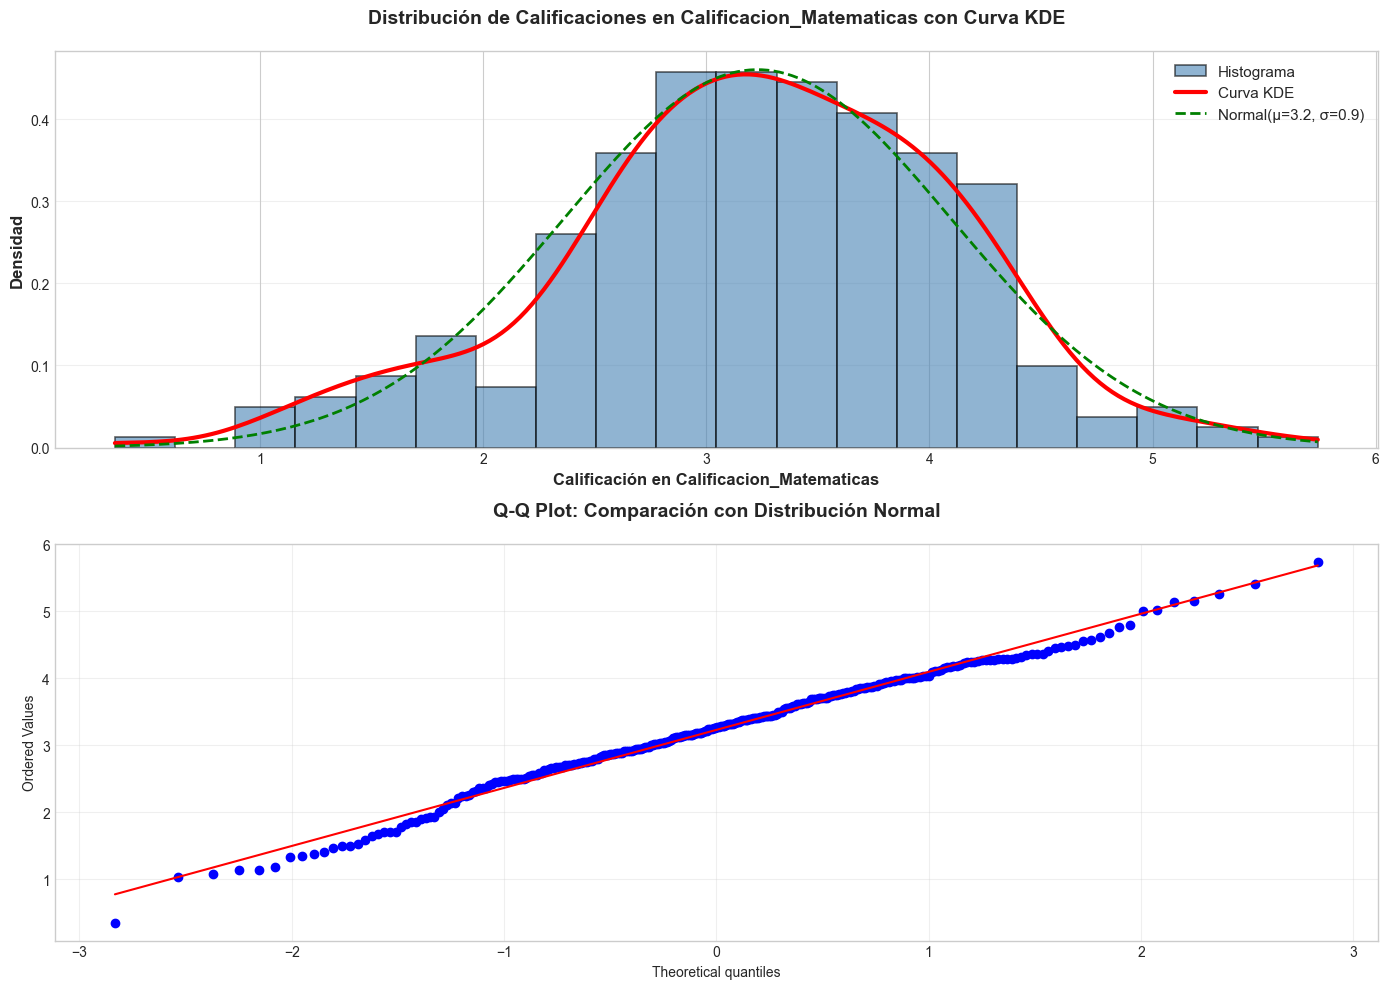

ESTADÍSTICAS DE CALIFICACION_MATEMATICAS
Media: 3.23
Mediana: 3.26
Moda: 2.70
Desviación estándar: 0.87
Varianza: 0.75
Coeficiente de variación: 26.83%
Asimetría (Skewness): -0.285
Curtosis: 0.286

Test de Shapiro-Wilk para normalidad:
Estadístico: 0.9909
P-valor: 0.0588
Resultado: Los datos siguen una distribución normal (α=0.05)


In [26]:
# 6. Histograma con curva KDE: calificaciones en Matemáticas
col_matematicas = [col for col in df.columns if 'mat' in col.lower() or 'math' in col.lower()]

if col_matematicas:
    col_mat = col_matematicas[0]
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Gráfico 1: Histograma con KDE
    ax1 = axes[0]
    
    # Histograma
    n, bins, patches = ax1.hist(df[col_mat], bins=20, density=True, 
                                alpha=0.6, color='steelblue', 
                                edgecolor='black', linewidth=1.2, label='Histograma')
    
    # Curva KDE
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df[col_mat].dropna())
    x_range = np.linspace(df[col_mat].min(), df[col_mat].max(), 200)
    ax1.plot(x_range, kde(x_range), 'r-', linewidth=3, label='Curva KDE')
    
    # Curva normal teórica
    from scipy.stats import norm
    mu, sigma = df[col_mat].mean(), df[col_mat].std()
    ax1.plot(x_range, norm.pdf(x_range, mu, sigma), 'g--', 
            linewidth=2, label=f'Normal(μ={mu:.1f}, σ={sigma:.1f})')
    
    ax1.set_xlabel(f'Calificación en {col_mat}', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Densidad', fontsize=12, fontweight='bold')
    ax1.set_title(f'Distribución de Calificaciones en {col_mat} con Curva KDE', 
                 fontsize=14, fontweight='bold', pad=20)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Gráfico 2: Comparación con distribución normal (Q-Q Plot)
    ax2 = axes[1]
    from scipy.stats import probplot
    probplot(df[col_mat].dropna(), dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q Plot: Comparación con Distribución Normal', 
                 fontsize=14, fontweight='bold', pad=20)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)
    print(f"ESTADÍSTICAS DE {col_mat.upper()}")
    print("=" * 80)
    print(f"Media: {mu:.2f}")
    print(f"Mediana: {df[col_mat].median():.2f}")
    print(f"Moda: {df[col_mat].mode().values[0]:.2f}")
    print(f"Desviación estándar: {sigma:.2f}")
    print(f"Varianza: {sigma**2:.2f}")
    print(f"Coeficiente de variación: {(sigma/mu)*100:.2f}%")
    print(f"Asimetría (Skewness): {df[col_mat].skew():.3f}")
    print(f"Curtosis: {df[col_mat].kurtosis():.3f}")
    
    # Test de normalidad
    from scipy.stats import shapiro
    stat, p_value = shapiro(df[col_mat].dropna())
    print(f"\nTest de Shapiro-Wilk para normalidad:")
    print(f"Estadístico: {stat:.4f}")
    print(f"P-valor: {p_value:.4f}")
    print(f"Resultado: {'Los datos NO siguen una distribución normal' if p_value < 0.05 else 'Los datos siguen una distribución normal'} (α=0.05)")
else:
    print("⚠ No se encontró columna de Matemáticas")

## 13. Resumen Final de Visualizaciones

Se han creado las siguientes visualizaciones del dataset de educación:

1. ✅ **Gráfico circular**: Proporción de estudiantes por nivel de uso de tecnología
2. ✅ **Gráfico de líneas**: Variación del promedio de calificaciones de Estadística según edad
3. ✅ **Histograma de frecuencias**: Distribución de horas de estudio
4. ✅ **Diagrama de caja y bigotes**: Comparación de calificaciones de Estadística entre géneros
5. ✅ **Diagrama de dispersión**: Relación entre horas de estudio y calificación en Estadística
6. ✅ **Histograma con curva KDE**: Distribución de calificaciones en Matemáticas

### Conclusiones Principales:
- Los datos han sido limpiados exitosamente
- Todas las visualizaciones revelan patrones importantes en el comportamiento educativo
- Se pueden identificar correlaciones y distribuciones clave para toma de decisiones